***
***
***

<br><h2>Apprentice Chef</h2>
<h4>Sheethal Melnarse</h4>

***
***
***

<h3>Context</h3>

</n> Apprentice Chef, Inc. is an innovative company with a unique spin on cooking at home.
Developed for the busy professional that has little to no skills in the kitchen, they offer a wide
selection of daily-prepared gourmet meals delivered directly to your door.


<h3>Objective</h3>

</n> Determining the important features from the given dataset and building a machine learning model to predict how much <strong>Revenue<strong> each customers is gonna bring within their first year.

***

<h4>Load Data</h4>

</n>Let's start by importing libraries and loading the data. We can take a look at the features and try to understand them.


In [90]:
# importing libraries
import numpy as np
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # enhanced data visualization
import statsmodels.formula.api as smf # linear regression (statsmodels)
import sklearn.model_selection 
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)
import sklearn.model_selection
import random as rand # random number generation


# loading data
file = 'Apprentice_Chef_Dataset.xlsx'
original_df = pd.read_excel(file)

# Renaming the file name
my_chef = original_df


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
#my_chef.head(n = 5)

***
<h3>Feature Engineering</h3>
    

***

Using two step process, we can split the emails into domain names and we can group them as:
* <strong>Personal<strong>
* <strong>Professional<strong>
* <strong>Junk<strong>

In [91]:
# STEP 1: splitting personal emails

# placeholder list
placeholder_lst = []

# looping over each email address
for index, col in my_chef.iterrows():
    
    # splitting email domain at '@'
    split_email = my_chef.loc[index, 'EMAIL'].split(sep = '@')
    
    # appending placeholder_lst with the results
    placeholder_lst.append(split_email)
    

# converting placeholder_lst into a DataFrame 
email_df = pd.DataFrame(placeholder_lst)


# displaying the results
#email_df

In [92]:
# STEP 2: concatenating with original DataFrame

# safety measure in case of multiple concatenations
my_chef = pd.read_excel(file)


# renaming column to concatenate
email_df.columns = ['NAME' , 'EMAIL_DOMAIN']


# concatenating personal_email_domain with friends DataFrame
my_chef = pd.concat([my_chef, email_df['EMAIL_DOMAIN']],
                   axis = 1)

# printing value counts of personal_email_domain
my_chef.loc[: ,'EMAIL_DOMAIN'].value_counts()

# email domain types
personal_domains = ['@gmail.com', '@protonmail.com', '@yahoo.com']
professional_domains  = ['@mmm.com','@amex.com','@apple.com','@boeing.com','@caterpillar.com','@chevron.com','@cisco.com','@cocacola.com','@disney.com','@dupont.com','@exxon.com','@ge.org','@goldmansacs.com','@homedepot.com','@ibm.com','@intel.com','@jnj.com','@jpmorgan.com','@mcdonalds.com','@merck.com','@microsoft.com','@nike.com','@pfizer.com','@pg.com','@travelers.com','@unitedtech.com','@unitedhealth.com','@verizon.com','@visa.com','@walmart.com']
junk_domains = ['@me.com','@aol.com','@hotmail.com','@live.com','@msn.com','@passport.com']

# placeholder list
placeholder_lst = []


# looping to group observations by domain type
for domain in my_chef['EMAIL_DOMAIN']:
    if '@' + domain in personal_domains:
        placeholder_lst.append('personal')
        
    elif '@' + domain in professional_domains:
        placeholder_lst.append('professional')
    
    elif '@' + domain in junk_domains:
        placeholder_lst.append('junk')
        
    else:
        print('Unknown')


# concatenating with original DataFrame
my_chef['DOMAIN_GROUP'] = pd.Series(placeholder_lst)


# checking results
#my_chef['DOMAIN_GROUP'].value_counts()

***
Let's check if the dataset has any missing fields and impute them appropriately. 

In [93]:
# Checking whether dataset has any empty fields
my_chef.isnull().sum()

REVENUE                          0
CROSS_SELL_SUCCESS               0
NAME                             0
EMAIL                            0
FIRST_NAME                       0
FAMILY_NAME                     47
TOTAL_MEALS_ORDERED              0
UNIQUE_MEALS_PURCH               0
CONTACTS_W_CUSTOMER_SERVICE      0
PRODUCT_CATEGORIES_VIEWED        0
AVG_TIME_PER_SITE_VISIT          0
MOBILE_NUMBER                    0
CANCELLATIONS_BEFORE_NOON        0
CANCELLATIONS_AFTER_NOON         0
TASTES_AND_PREFERENCES           0
PC_LOGINS                        0
MOBILE_LOGINS                    0
WEEKLY_PLAN                      0
EARLY_DELIVERIES                 0
LATE_DELIVERIES                  0
PACKAGE_LOCKER                   0
REFRIGERATED_LOCKER              0
FOLLOWED_RECOMMENDATIONS_PCT     0
AVG_PREP_VID_TIME                0
LARGEST_ORDER_SIZE               0
MASTER_CLASSES_ATTENDED          0
MEDIAN_MEAL_RATING               0
AVG_CLICKS_PER_VISIT             0
TOTAL_PHOTOS_VIEWED 

In [94]:
# Imputing the NULL values with 'Unknown'
my_chef['FAMILY_NAME'].fillna(value='Unknown')
my_chef = my_chef.drop('NAME', axis = 1)
my_chef = my_chef.drop('EMAIL', axis = 1)
my_chef = my_chef.drop('FIRST_NAME', axis = 1)

***
<strong>Base Model</strong>

Let's build a base model before adding new features to the dataset. We can later compare this with our final model and see the impact of feature engineering
    


In [95]:
# building a base model

# blueprinting a model type
lm_price_qual = smf.ols(formula = """REVENUE ~ my_chef['TOTAL_MEALS_ORDERED']""",
                        data = my_chef)


# telling Python to run the data through the blueprint
results = lm_price_qual.fit()


# printing the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                REVENUE   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     1096.
Date:                Sat, 07 Mar 2020   Prob (F-statistic):          4.99e-191
Time:                        22:58:33   Log-Likelihood:                -16020.
No. Observations:                1946   AIC:                         3.204e+04
Df Residuals:                    1944   BIC:                         3.206e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept   

***
Let's plot a histogram for significant feature and see how they are distributed

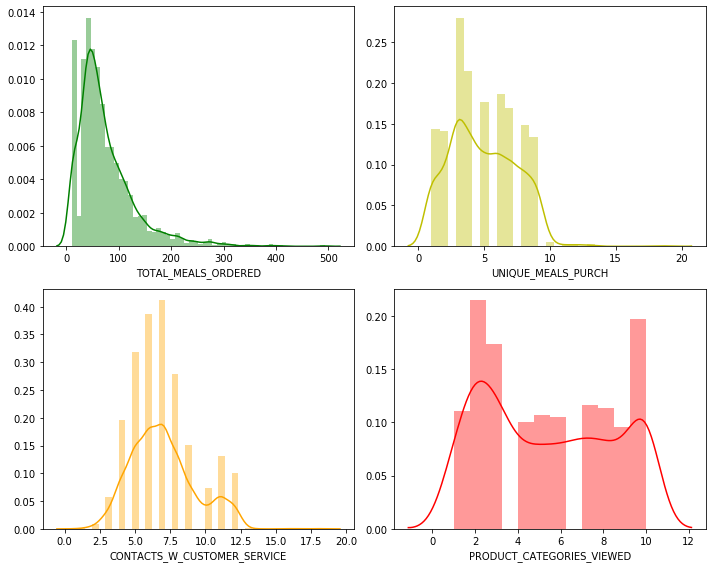

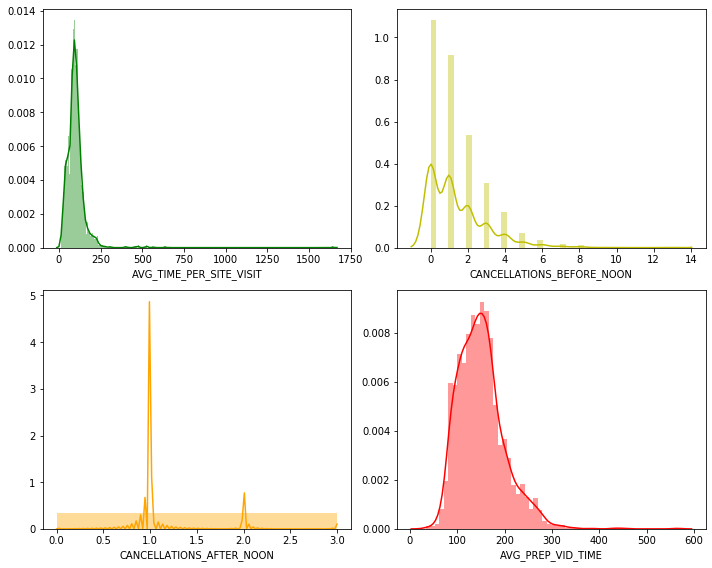

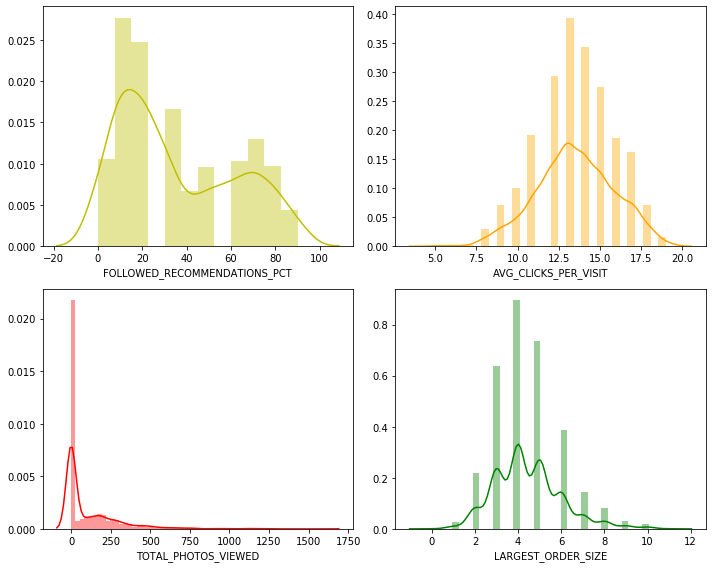

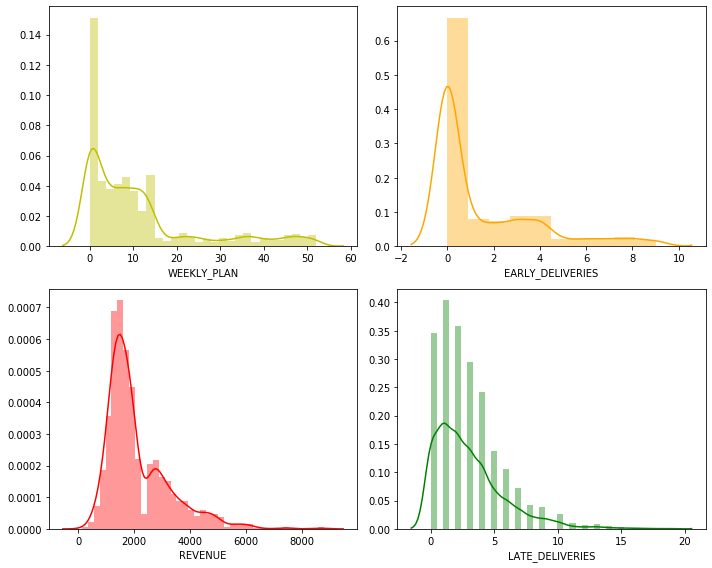

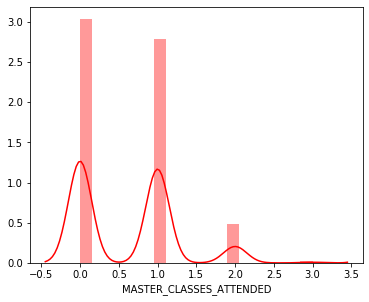

In [96]:
########################
# Visual EDA (Histograms)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(my_chef['TOTAL_MEALS_ORDERED'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 2)
sns.distplot(my_chef['UNIQUE_MEALS_PURCH'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################

plt.subplot(2, 2, 3)
sns.distplot(my_chef['CONTACTS_W_CUSTOMER_SERVICE'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')

########################
plt.subplot(2, 2, 4)
sns.distplot(my_chef['PRODUCT_CATEGORIES_VIEWED'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')
plt.tight_layout()
plt.savefig('Apprentice_Chef Data Histogram 1 of 5.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(my_chef['AVG_TIME_PER_SITE_VISIT'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################

plt.subplot(2, 2, 2)
sns.distplot(my_chef['CANCELLATIONS_BEFORE_NOON'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')

########################

plt.subplot(2, 2, 3)
sns.distplot(my_chef['CANCELLATIONS_AFTER_NOON'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('CANCELLATIONS_AFTER_NOON')

########################

plt.subplot(2, 2, 4)
sns.distplot(my_chef['AVG_PREP_VID_TIME'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('AVG_PREP_VID_TIME')
plt.tight_layout()
plt.savefig('Apprentice_Chef Data Histogram 2 of 5.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(my_chef['FOLLOWED_RECOMMENDATIONS_PCT'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

########################

plt.subplot(2, 2, 2)
sns.distplot(my_chef['AVG_CLICKS_PER_VISIT'],
             bins  = 'fd',
             color = 'orange')
plt.xlabel('AVG_CLICKS_PER_VISIT')

########################

plt.subplot(2, 2, 3)
sns.distplot(my_chef['TOTAL_PHOTOS_VIEWED'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('TOTAL_PHOTOS_VIEWED')

########################

plt.subplot(2, 2, 4)
sns.distplot(my_chef['LARGEST_ORDER_SIZE'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('LARGEST_ORDER_SIZE')
plt.tight_layout()
plt.savefig('Apprentice_Chef Data Histogram 3 of 5.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(my_chef['WEEKLY_PLAN'],
             bins  = 'fd',
             color = 'y')
plt.xlabel('WEEKLY_PLAN')

########################

plt.subplot(2, 2, 2)
sns.distplot(my_chef['EARLY_DELIVERIES'],
             bins = 10,
             color = 'orange')
plt.xlabel('EARLY_DELIVERIES')

########################

plt.subplot(2, 2, 3)
sns.distplot(my_chef['REVENUE'],
             bins = 'fd',
             color = 'r')
plt.xlabel('REVENUE')

########################

plt.subplot(2, 2, 4)
sns.distplot(my_chef['LATE_DELIVERIES'],
             bins  = 'fd',
             color = 'g')
plt.xlabel('LATE_DELIVERIES')
plt.tight_layout()
plt.savefig('Apprentice_Chef Data Histogram 4 of 5.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.distplot(my_chef['MASTER_CLASSES_ATTENDED'],
             bins  = 'fd',
             color = 'r')
plt.xlabel('MASTER_CLASSES_ATTENDED')
plt.tight_layout()
plt.savefig('Apprentice_Chef Data Histogram 5 of 5.png')
plt.show()

***
After analyzing the plots, we can start flagging the outliers and develop new features.

In [97]:
TOTAL_MEALS_ORDERED_HI = 120
UNIQUE_MEALS_PURCH_HI = 7
CONTACTS_W_CUSTOMER_SERVICE_HI = 9
PRODUCT_CATEGORIES_VIEWED_HI = 6
AVG_TIME_PER_SITE_VISIT_HI = 160
CANCELLATIONS_BEFORE_NOON_HI = 4
CANCELLATIONS_BEFORE_NOON_LO = 0
CANCELLATIONS_AFTER_NOON_HI = 2
AVG_PREP_VID_TIME_HI = 230
FOLLOWED_RECOMMENDATIONS_PCT_HI = 40
AVG_CLICKS_PER_VISIT_HI = 16
TOTAL_PHOTOS_VIEWED_LO = 60
LARGEST_ORDER_SIZE_HI = 6
WEEKLY_PLAN_HI = 19
WEEKLY_PLAN_LO = 0
EARLY_DELIVERIES_HI = 5
EARLY_DELIVERIES_LO = 1
LATE_DELIVERIES_HI = 7
MASTER_CLASSES_ATTENDED_HI = 1.5

## REVENUE
REVENUE_HI = 2100

##############################################################################
## Feature Engineering (outlier thresholds)                                 ##
##############################################################################

# developing features (columns) for outliers

# TOTAL_MEALS_ORDERED
my_chef['OUT_TOTAL_MEALS_ORDERED'] = 0
condition_hi = my_chef.loc[0:,'OUT_TOTAL_MEALS_ORDERED'][my_chef['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_HI]

my_chef['OUT_TOTAL_MEALS_ORDERED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# UNIQUE_MEALS_PURCH
my_chef['OUT_UNIQUE_MEALS_PURCH'] = 0
condition_hi = my_chef.loc[0:,'OUT_UNIQUE_MEALS_PURCH'][my_chef['UNIQUE_MEALS_PURCH'] > UNIQUE_MEALS_PURCH_HI]

my_chef['OUT_UNIQUE_MEALS_PURCH'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# CONTACTS_W_CUSTOMER_SERVICE
my_chef['OUT_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition_hi = my_chef.loc[0:,'OUT_CONTACTS_W_CUSTOMER_SERVICE'][my_chef['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_HI]

my_chef['OUT_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# PRODUCT_CATEGORIES_VIEWED
my_chef['OUT_PRODUCT_CATEGORIES_VIEWED'] = 0
condition_hi = my_chef.loc[0:,'OUT_PRODUCT_CATEGORIES_VIEWED'][my_chef['PRODUCT_CATEGORIES_VIEWED'] > PRODUCT_CATEGORIES_VIEWED_HI]

my_chef['OUT_PRODUCT_CATEGORIES_VIEWED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# AVG_TIME_PER_SITE_VISIT
my_chef['OUT_AVG_TIME_PER_SITE_VISIT'] = 0
condition_hi = my_chef.loc[0:,'OUT_AVG_TIME_PER_SITE_VISIT'][my_chef['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_HI]

my_chef['OUT_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# CANCELLATIONS_BEFORE_NOON
my_chef['OUT_CANCELLATIONS_BEFORE_NOON'] = 0
condition_hi = my_chef.loc[0:,'OUT_CANCELLATIONS_BEFORE_NOON'][my_chef['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_HI]
condition_lo = my_chef.loc[0:,'OUT_CANCELLATIONS_BEFORE_NOON'][my_chef['CANCELLATIONS_BEFORE_NOON'] < CANCELLATIONS_BEFORE_NOON_LO]

my_chef['OUT_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

my_chef['OUT_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

# CANCELLATIONS_AFTER_NOON
my_chef['OUT_CANCELLATIONS_AFTER_NOON'] = 0
condition_hi = my_chef.loc[0:,'OUT_CANCELLATIONS_AFTER_NOON'][my_chef['CANCELLATIONS_AFTER_NOON'] > CANCELLATIONS_AFTER_NOON_HI]

my_chef['OUT_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# AVG_PREP_VID_TIME
my_chef['OUT_AVG_PREP_VID_TIME'] = 0
condition_hi = my_chef.loc[0:,'OUT_AVG_PREP_VID_TIME'][my_chef['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_HI]

my_chef['OUT_AVG_PREP_VID_TIME'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# FOLLOWED_RECOMMENDATIONS_PCT
my_chef['OUT_FOLLOWED_RECOMMENDATIONS_PCT'] = 0
condition_hi = my_chef.loc[0:,'OUT_FOLLOWED_RECOMMENDATIONS_PCT'][my_chef['FOLLOWED_RECOMMENDATIONS_PCT'] > FOLLOWED_RECOMMENDATIONS_PCT_HI]

my_chef['OUT_FOLLOWED_RECOMMENDATIONS_PCT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# EARLY_DELIVERIES
my_chef['OUT_EARLY_DELIVERIES'] = 0
condition_hi = my_chef.loc[0:,'OUT_EARLY_DELIVERIES'][my_chef['EARLY_DELIVERIES'] > EARLY_DELIVERIES_HI]
condition_lo = my_chef.loc[0:,'OUT_EARLY_DELIVERIES'][my_chef['EARLY_DELIVERIES'] < EARLY_DELIVERIES_LO]

my_chef['OUT_EARLY_DELIVERIES'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

my_chef['OUT_EARLY_DELIVERIES'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

# AVG_CLICKS_PER_VISIT
my_chef['OUT_AVG_CLICKS_PER_VISIT'] = 0
condition_hi = my_chef.loc[0:,'OUT_AVG_CLICKS_PER_VISIT'][my_chef['AVG_CLICKS_PER_VISIT'] > AVG_CLICKS_PER_VISIT_HI]

my_chef['OUT_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# TOTAL_PHOTOS_VIEWED
my_chef['OUT_TOTAL_PHOTOS_VIEWED'] = 0
condition_hi = my_chef.loc[0:,'OUT_TOTAL_PHOTOS_VIEWED'][my_chef['TOTAL_PHOTOS_VIEWED'] < TOTAL_PHOTOS_VIEWED_LO]

my_chef['OUT_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# LARGEST_ORDER_SIZE
my_chef['OUT_LARGEST_ORDER_SIZE'] = 0
condition_hi = my_chef.loc[0:,'OUT_LARGEST_ORDER_SIZE'][my_chef['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_HI]

my_chef['OUT_LARGEST_ORDER_SIZE'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# WEEKLY_PLAN
my_chef['OUT_WEEKLY_PLAN'] = 0
condition_hi = my_chef.loc[0:,'OUT_WEEKLY_PLAN'][my_chef['WEEKLY_PLAN'] > WEEKLY_PLAN_HI]
condition_lo = my_chef.loc[0:,'OUT_WEEKLY_PLAN'][my_chef['WEEKLY_PLAN'] < WEEKLY_PLAN_LO]

my_chef['OUT_WEEKLY_PLAN'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

my_chef['OUT_WEEKLY_PLAN'].replace(to_replace = condition_lo,
                                value      = 1,
                                inplace    = True)

# LATE_DELIVERIES
my_chef['OUT_LATE_DELIVERIES'] = 0
condition_hi = my_chef.loc[0:,'OUT_LATE_DELIVERIES'][my_chef['LATE_DELIVERIES'] > LATE_DELIVERIES_HI]

my_chef['OUT_LATE_DELIVERIES'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)

# MASTER_CLASSES_ATTENDED
my_chef['OUT_MASTER_CLASSES_ATTENDED'] = 0
condition_hi = my_chef.loc[0:,'OUT_MASTER_CLASSES_ATTENDED'][my_chef['MASTER_CLASSES_ATTENDED'] > MASTER_CLASSES_ATTENDED_HI]

my_chef['OUT_MASTER_CLASSES_ATTENDED'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)


# REVENUE
my_chef['OUT_REVENUE'] = 0
condition_hi = my_chef.loc[0:,'OUT_REVENUE'][my_chef['REVENUE'] > REVENUE_HI]

my_chef['OUT_REVENUE'].replace(to_replace = condition_hi,
                                value      = 1,
                                inplace    = True)



***
Here, we can compare all the significant features against our target feature (<strong>REVENUE</strong>). 
Let's plot a scatterplots to see their relationship.

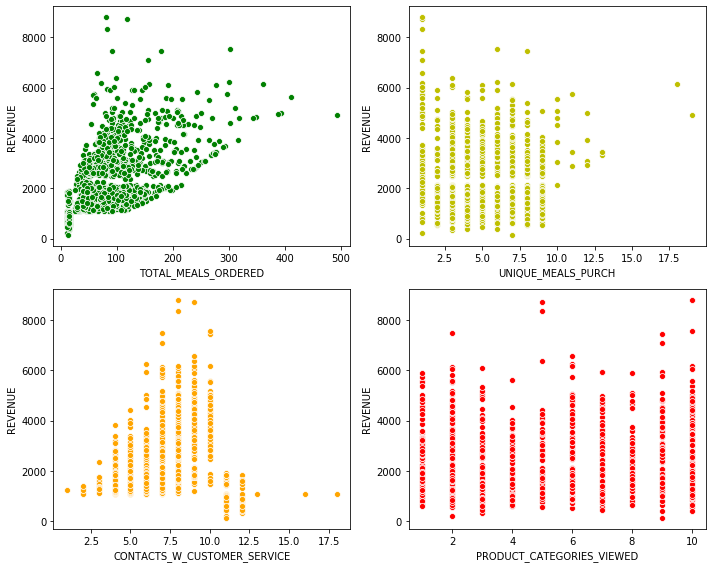

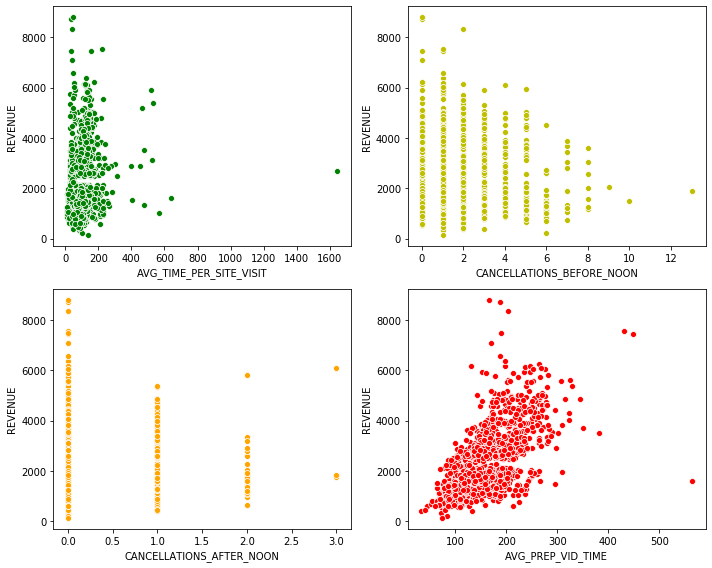

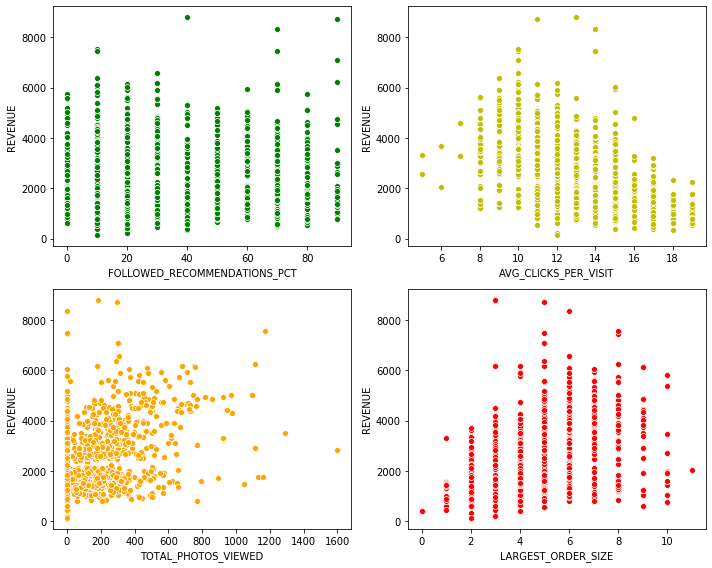

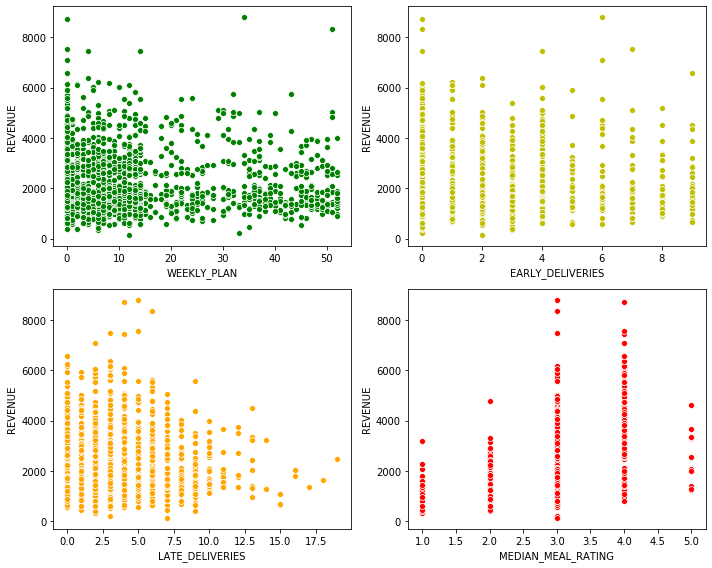

In [98]:
########################
# Visual EDA (Scatterplots)
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = my_chef['TOTAL_MEALS_ORDERED'],
                y = my_chef['REVENUE'],
                color = 'g')
plt.xlabel('TOTAL_MEALS_ORDERED')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = my_chef['UNIQUE_MEALS_PURCH'],
                y = my_chef['REVENUE'],
                color = 'y')
plt.xlabel('UNIQUE_MEALS_PURCH')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = my_chef['CONTACTS_W_CUSTOMER_SERVICE'],
                y = my_chef['REVENUE'],
                color = 'orange')
plt.xlabel('CONTACTS_W_CUSTOMER_SERVICE')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = my_chef['PRODUCT_CATEGORIES_VIEWED'],
                y = my_chef['REVENUE'],
                color = 'r')
plt.xlabel('PRODUCT_CATEGORIES_VIEWED')
plt.tight_layout()
plt.savefig('Apprentice_Chef Data Scatterplots 1 of 4.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = my_chef['AVG_TIME_PER_SITE_VISIT'],
                y = my_chef['REVENUE'],
                color = 'g')
plt.xlabel('AVG_TIME_PER_SITE_VISIT')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = my_chef['CANCELLATIONS_BEFORE_NOON'],
                y = my_chef['REVENUE'],
                color = 'y')
plt.xlabel('CANCELLATIONS_BEFORE_NOON')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = my_chef['CANCELLATIONS_AFTER_NOON'],
                y = my_chef['REVENUE'],
                color = 'orange')
plt.xlabel('CANCELLATIONS_AFTER_NOON')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = my_chef['AVG_PREP_VID_TIME'],
                y = my_chef['REVENUE'],
                color = 'r')
plt.xlabel('AVG_PREP_VID_TIME')
plt.tight_layout()
plt.savefig('Apprentice_Chef Data Scatterplots 2 of 4.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = my_chef['FOLLOWED_RECOMMENDATIONS_PCT'],
                y = my_chef['REVENUE'],
                color = 'g')
plt.xlabel('FOLLOWED_RECOMMENDATIONS_PCT')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = my_chef['AVG_CLICKS_PER_VISIT'],
                y = my_chef['REVENUE'],
                color = 'y')
plt.xlabel('AVG_CLICKS_PER_VISIT')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = my_chef['TOTAL_PHOTOS_VIEWED'],
                y = my_chef['REVENUE'],
                color = 'orange')
plt.xlabel('TOTAL_PHOTOS_VIEWED')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = my_chef['LARGEST_ORDER_SIZE'],
                y = my_chef['REVENUE'],
                color = 'r')
plt.xlabel('LARGEST_ORDER_SIZE')
plt.tight_layout()
plt.savefig('Apprentice_Chef Data Scatterplots 3 of 4.png')
plt.show()

########################
########################

fig, ax = plt.subplots(figsize = (10, 8))
plt.subplot(2, 2, 1)
sns.scatterplot(x = my_chef['WEEKLY_PLAN'],
                y = my_chef['REVENUE'],
                color = 'g')
plt.xlabel('WEEKLY_PLAN')

########################

plt.subplot(2, 2, 2)
sns.scatterplot(x = my_chef['EARLY_DELIVERIES'],
                y = my_chef['REVENUE'],
                color = 'y')
plt.xlabel('EARLY_DELIVERIES')

########################

plt.subplot(2, 2, 3)
sns.scatterplot(x = my_chef['LATE_DELIVERIES'],
                y = my_chef['REVENUE'],
                color = 'orange')
plt.xlabel('LATE_DELIVERIES')

########################
plt.subplot(2, 2, 4)
sns.scatterplot(x = my_chef['MEDIAN_MEAL_RATING'],
                y = my_chef['REVENUE'],
                color = 'r')
plt.xlabel('MEDIAN_MEAL_RATING')
plt.tight_layout()
plt.savefig('Apprentice_Chef Data Scatterplots 4 of 4.png')
plt.show()



***
Based on the above observation of the scatter plots, we can flag the points where trend changes and then create new features.

In [99]:
# setting trend-based thresholds
# HIGH
TOTAL_MEALS_ORDERED_CHANGE_HI = 140 # data scatters above this point
CONTACTS_W_CUSTOMER_SERVICE_CHANGE_HI = 10.5 # data scatters above this point
AVG_TIME_PER_SITE_VISIT_CHANGE_HI = 200 # data scatters above this point
CANCELLATIONS_BEFORE_NOON_CHANGE_HI = 5 # data scatters above this point
AVG_PREP_VID_TIME_CHANGE_HI = 250 # data scatters above this point
TOTAL_PHOTOS_VIEWED_CHANGE_HI = 400 # data scatters above this point
LARGEST_ORDER_SIZE_CHANGE_HI = 8 # data scatters above this point
WEEKLY_PLAN_CHANGE_HI = 14 # data scatters above this point
LATE_DELIVERIES_CHANGE_HI = 7.5 # data scatters above this point


# LOW
AVG_CLICKS_PER_VISIT_CHANGE_LO = 11 # data scatters below this point
LARGEST_ORDER_SIZE_CHANGE_LO = 2 # data scatters below this point

# AT SPECIFIC POINT
UNIQUE_MEALS_PURCH_CHANGE_AT = 1 # only changes at 1
CANCELLATIONS_AFTER_NOON_CHANGE_AT = 0 # zero inflated
TOTAL_PHOTOS_VIEWED_CHANGE_AT = 0 # zero inflated
WEEKLY_PLAN_CHANGE_AT = 0 # zero inflated
MEDIAN_MEAL_RATING_CHANGE_AT = 3

##############################################################################
## Feature Engineering (trend changes)                                      ##
##############################################################################

########################################
## change above threshold                ##
########################################

# greater than sign

# TOTAL_MEALS_ORDERED
my_chef['CHANGE_TOTAL_MEALS_ORDERED'] = 0
condition = my_chef.loc[0:,'CHANGE_TOTAL_MEALS_ORDERED'][my_chef['TOTAL_MEALS_ORDERED'] > TOTAL_MEALS_ORDERED_CHANGE_HI]

my_chef['CHANGE_TOTAL_MEALS_ORDERED'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# CONTACTS_W_CUSTOMER_SERVICE
my_chef['CHANGE_CONTACTS_W_CUSTOMER_SERVICE'] = 0
condition = my_chef.loc[0:,'CHANGE_CONTACTS_W_CUSTOMER_SERVICE'][my_chef['CONTACTS_W_CUSTOMER_SERVICE'] > CONTACTS_W_CUSTOMER_SERVICE_CHANGE_HI]

my_chef['CHANGE_CONTACTS_W_CUSTOMER_SERVICE'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# AVG_TIME_PER_SITE_VISIT
my_chef['CHANGE_AVG_TIME_PER_SITE_VISIT'] = 0
condition = my_chef.loc[0:,'CHANGE_AVG_TIME_PER_SITE_VISIT'][my_chef['AVG_TIME_PER_SITE_VISIT'] > AVG_TIME_PER_SITE_VISIT_CHANGE_HI]

my_chef['CHANGE_AVG_TIME_PER_SITE_VISIT'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# CANCELLATIONS_BEFORE_NOON
my_chef['CHANGE_CANCELLATIONS_BEFORE_NOON'] = 0
condition = my_chef.loc[0:,'CHANGE_CANCELLATIONS_BEFORE_NOON'][my_chef['CANCELLATIONS_BEFORE_NOON'] > CANCELLATIONS_BEFORE_NOON_CHANGE_HI]

my_chef['CHANGE_CANCELLATIONS_BEFORE_NOON'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# AVG_PREP_VID_TIME
my_chef['CHANGE_AVG_PREP_VID_TIME'] = 0
condition = my_chef.loc[0:,'CHANGE_AVG_PREP_VID_TIME'][my_chef['AVG_PREP_VID_TIME'] > AVG_PREP_VID_TIME_CHANGE_HI]

my_chef['CHANGE_AVG_PREP_VID_TIME'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# TOTAL_PHOTOS_VIEWED
my_chef['CHANGE_TOTAL_PHOTOS_VIEWED'] = 0
condition = my_chef.loc[0:,'CHANGE_TOTAL_PHOTOS_VIEWED'][my_chef['TOTAL_PHOTOS_VIEWED'] > TOTAL_PHOTOS_VIEWED_CHANGE_HI]
condition_a = my_chef.loc[0:,'CHANGE_TOTAL_PHOTOS_VIEWED'][my_chef['TOTAL_PHOTOS_VIEWED'] == TOTAL_PHOTOS_VIEWED_CHANGE_AT]

my_chef['CHANGE_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)
my_chef['CHANGE_TOTAL_PHOTOS_VIEWED'].replace(to_replace = condition_a,
                                   value      = 1,
                                   inplace    = True)


# LARGEST_ORDER_SIZE
my_chef['CHANGE_LARGEST_ORDER_SIZE'] = 0
condition = my_chef.loc[0:,'CHANGE_LARGEST_ORDER_SIZE'][my_chef['LARGEST_ORDER_SIZE'] > LARGEST_ORDER_SIZE_CHANGE_HI]
condition_l = my_chef.loc[0:,'CHANGE_LARGEST_ORDER_SIZE'][my_chef['LARGEST_ORDER_SIZE'] < LARGEST_ORDER_SIZE_CHANGE_LO]

my_chef['CHANGE_LARGEST_ORDER_SIZE'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)
my_chef['CHANGE_LARGEST_ORDER_SIZE'].replace(to_replace = condition_l,
                                   value      = 1,
                                   inplace    = True)


# LATE_DELIVERIES
my_chef['CHANGE_LATE_DELIVERIES'] = 0
condition = my_chef.loc[0:,'CHANGE_LATE_DELIVERIES'][my_chef['LATE_DELIVERIES'] > LATE_DELIVERIES_CHANGE_HI]

my_chef['CHANGE_LATE_DELIVERIES'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

########################################
## change below threshold                ##
########################################

# lower than sign

# AVG_CLICKS_PER_VISIT
my_chef['CHANGE_AVG_CLICKS_PER_VISIT'] = 0
condition = my_chef.loc[0:,'CHANGE_AVG_CLICKS_PER_VISIT'][my_chef['AVG_CLICKS_PER_VISIT'] < AVG_CLICKS_PER_VISIT_CHANGE_LO]

my_chef['CHANGE_AVG_CLICKS_PER_VISIT'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)


########################################
## change at threshold                ##
########################################

# double-equals sign

# UNIQUE_MEALS_PURCH
my_chef['CHANGE_UNIQUE_MEALS_PURCH'] = 0
condition = my_chef.loc[0:,'CHANGE_UNIQUE_MEALS_PURCH'][my_chef['UNIQUE_MEALS_PURCH'] == UNIQUE_MEALS_PURCH_CHANGE_AT]

my_chef['CHANGE_UNIQUE_MEALS_PURCH'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# CANCELLATIONS_AFTER_NOON
my_chef['CHANGE_CANCELLATIONS_AFTER_NOON'] = 0
condition = my_chef.loc[0:,'CHANGE_CANCELLATIONS_AFTER_NOON'][my_chef['CANCELLATIONS_AFTER_NOON'] == CANCELLATIONS_AFTER_NOON_CHANGE_AT]

my_chef['CHANGE_CANCELLATIONS_AFTER_NOON'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)

# WEEKLY_PLAN
my_chef['CHANGE_WEEKLY_PLAN'] = 0
condition = my_chef.loc[0:,'CHANGE_WEEKLY_PLAN'][my_chef['WEEKLY_PLAN'] == WEEKLY_PLAN_CHANGE_AT]
condition_h = my_chef.loc[0:,'CHANGE_WEEKLY_PLAN'][my_chef['WEEKLY_PLAN'] > WEEKLY_PLAN_CHANGE_HI]

my_chef['CHANGE_WEEKLY_PLAN'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)
my_chef['CHANGE_WEEKLY_PLAN'].replace(to_replace = condition_h,
                                   value      = 1,
                                   inplace    = True)

# MEDIAN_MEAL_RATING
my_chef['CHANGE_MEDIAN_MEAL_RATING'] = 0
condition = my_chef.loc[0:,'CHANGE_MEDIAN_MEAL_RATING'][my_chef['MEDIAN_MEAL_RATING'] == MEDIAN_MEAL_RATING_CHANGE_AT]

my_chef['CHANGE_MEDIAN_MEAL_RATING'].replace(to_replace = condition,
                                   value      = 1,
                                   inplace    = True)


***
Since, <strong>MEDIAN_MEAL_RATING</strong> is a categorical feature, we can one hot encode <strong>get_dummies</strong>.\
Then, remove the original categorical column using <strong>drop</strong>. Finally, merge the one hot encoded\
data with the original dataset using <strong>drop</strong>.

In [100]:
# one hot encoding categorical variables
ONE_HOT_MEDIAN_MEAL_RATING = pd.get_dummies(my_chef['MEDIAN_MEAL_RATING'])

# dropping categorical variables after they've been encoded
my_chef = my_chef.drop('MEDIAN_MEAL_RATING', axis = 1)

# joining codings together
my_chef = my_chef.join([ONE_HOT_MEDIAN_MEAL_RATING])


***
<strong>Pearson Correlation</strong>

Let's develop a correlation matrix with data rounded to two decimal places and then visualize it using heatmap.
(The complete correlation matrix has been analyzed, and instead of data dumping only correlation with some significance have been selected to visualize here)



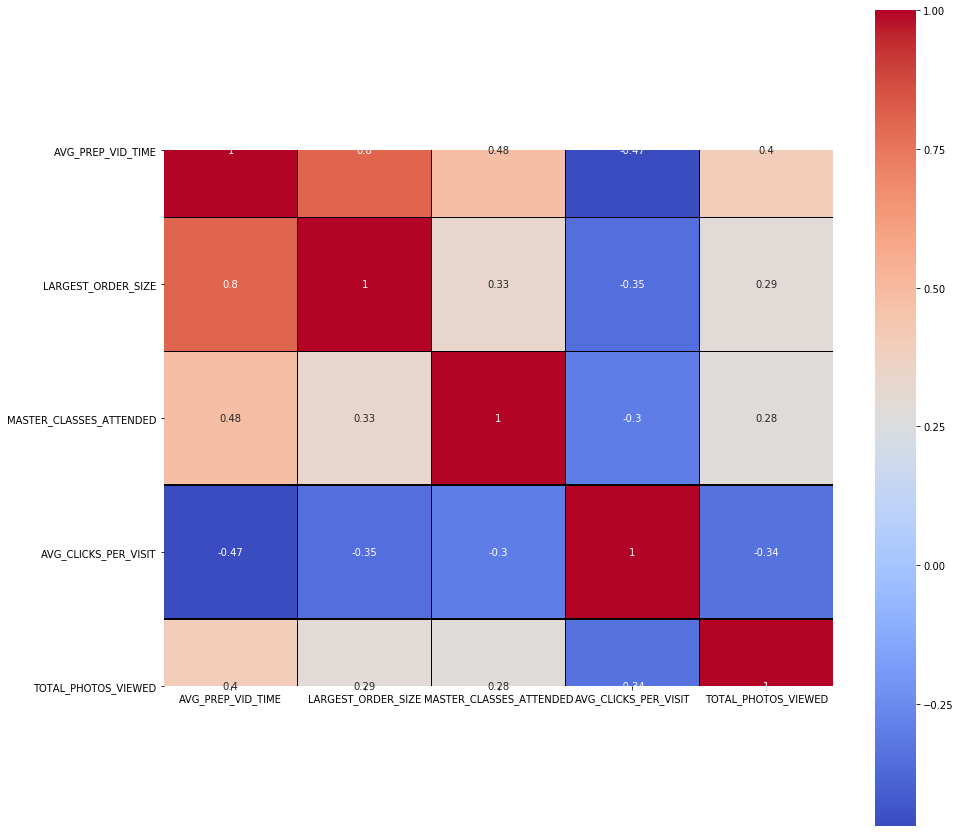

In [101]:
# correlation heatmap
my_chef_corr = my_chef.corr().round(2)
fig, ax = plt.subplots(figsize=(15,15))

my_chef_corr2 = my_chef_corr.iloc[19:24, 19:24]

sns.heatmap(my_chef_corr2,
            cmap = 'coolwarm',
            square = True,
            annot = True,
            linecolor = 'black',
            linewidths = 0.25)


plt.savefig('Apprentice_Chef Correlation Heatmap.png')
plt.show()

***
After feature engineering, we can save the data by creating new file.

In [102]:
# saving feature-rich dataset in Excel
my_chef.to_excel('my_chef_feature_rich.xlsx',
                 index = False)

***
<h3>Predictive Model using Scikit-learn</h3>



***
After building full model and analyzing their p-value, we determined which features have lower p-value and are significant.

We can select those significant features as dataframe and revenue as response variable.

Let's split the data into 75% train and 25% test to build the model and test against unseen data to get more realistic predictive accuracy.


In [103]:
# applying modelin scikit-learn

# declaring set of x-variables
x_variables = ['CROSS_SELL_SUCCESS','TOTAL_MEALS_ORDERED','CONTACTS_W_CUSTOMER_SERVICE','AVG_TIME_PER_SITE_VISIT',
              'CANCELLATIONS_BEFORE_NOON','MOBILE_LOGINS','LATE_DELIVERIES','FOLLOWED_RECOMMENDATIONS_PCT',
              'AVG_PREP_VID_TIME','LARGEST_ORDER_SIZE','MASTER_CLASSES_ATTENDED','AVG_CLICKS_PER_VISIT','TOTAL_PHOTOS_VIEWED',
              'OUT_TOTAL_MEALS_ORDERED','OUT_UNIQUE_MEALS_PURCH','OUT_CONTACTS_W_CUSTOMER_SERVICE',
              'OUT_AVG_PREP_VID_TIME','OUT_FOLLOWED_RECOMMENDATIONS_PCT','OUT_AVG_CLICKS_PER_VISIT',
              'OUT_LARGEST_ORDER_SIZE','OUT_WEEKLY_PLAN','OUT_LATE_DELIVERIES','CHANGE_CONTACTS_W_CUSTOMER_SERVICE','CHANGE_LATE_DELIVERIES',
              'CHANGE_UNIQUE_MEALS_PURCH','CHANGE_WEEKLY_PLAN','CHANGE_CANCELLATIONS_AFTER_NOON','CHANGE_AVG_CLICKS_PER_VISIT',
              'OUT_AVG_TIME_PER_SITE_VISIT','EARLY_DELIVERIES',1,2,4,5]

# Preparing a DataFrame based the the analysis above
my_chef_data   = my_chef.loc[ : , x_variables]

# preparing response variable
my_chef_target = my_chef.loc[:,'REVENUE']


# running train/test split again
X_train, X_test, y_train, y_test = train_test_split(
                                    my_chef_data,
                                    my_chef_target,
                                    test_size = 0.25,
                                    random_state = 222)

***
<strong>Linear Regression Model<strong>

In [104]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(X_train, y_train)


# PREDICTING on new data
lr_pred = lr_fit.predict(X_test)


# SCORING the results
print('Training Score:', lr.score(X_train, y_train).round(4))
print('Testing Score:',  lr.score(X_test, y_test).round(4))

# saving scoring data for future use
lr_train_score = lr.score(X_train, y_train).round(4)
lr_test_score  = lr.score(X_test, y_test).round(4)


Training Score: 0.7826
Testing Score: 0.7234


***
<strong>Ridge Model<strong>

In [105]:
# INSTANTIATING a model object
ridge_model = sklearn.linear_model.Ridge()

# FITTING the training data
ridge_fit  = ridge_model.fit(X_train, y_train)


# PREDICTING on new data
ridge_pred = ridge_fit.predict(X_test)

print('Training Score:', ridge_model.score(X_train, y_train).round(4))
print('Testing Score:',  ridge_model.score(X_test, y_test).round(4))


# saving scoring data for future use
ridge_train_score = ridge_model.score(X_train, y_train).round(4)
ridge_test_score  = ridge_model.score(X_test, y_test).round(4)

Training Score: 0.7825
Testing Score: 0.7236


***
<strong>Lasso Model<strong>

In [106]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso()

# FITTING the training data
lasso_fit = lasso_model.fit(X_train, y_train)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(X_test)

print('Training Score:', lasso_model.score(X_train, y_train).round(4))
print('Testing Score:',  lasso_model.score(X_test, y_test).round(4))


# saving scoring data for future use
lasso_train_score = lasso_model.score(X_train, y_train).round(4)
lasso_test_score  = lasso_model.score(X_test, y_test).round(4)

Training Score: 0.7822
Testing Score: 0.7231


***
<strong>Comparing Models</strong>

Let's compare the above three models to choose the best performing final model.
    

In [107]:
# comparing results

print(f"""
Model      Train Score      Test Score
-----      -----------      ----------
OLS        {lr_train_score}           {lr_test_score}
Ridge      {ridge_train_score}          {ridge_test_score}
Lasso      {lasso_train_score}          {lasso_test_score}
""")


# creating a dictionary for model results
model_performance = {'Model'    : ['OLS', 'Ridge', 'Lasso'],
           
                     'Training' : [lr_train_score, ridge_train_score,
                                   lasso_train_score],
           
                     'Testing'  : [lr_test_score, ridge_test_score,
                                   lasso_test_score]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)


Model      Train Score      Test Score
-----      -----------      ----------
OLS        0.7826           0.7234
Ridge      0.7825          0.7236
Lasso      0.7822          0.7231



***
<strong>Final Model: Ridge</strong>

All three gives almost the same value but I'm choosing Ridge model because the difference between Train score and Test score is lowest among three models.

<strong>test_score: 0.724</strong>